### Multi-layer Perceptron Exercise
#### In this exercise, we will implement the multi-perceptron algorithm with two hidden layers. 
#### The implementation of the MLP algorithm will be in the mlp.py file but you will test your implementation 
#### in this notebook. In this exercise we will use the MNIST dataset that we used for week 2 lab (KNN). 

In [34]:
# importing the MLP algorithm from mlp.py file 
# where you will implement the MLP algorithm 
from mlp import MLP 
import numpy as np

# This is to reload all changed modules every time before executing a new line.
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
# loading the MNIST datatset
import pickle, gzip

f = gzip.open('../data/mnist.pkl.gz','rb')
tset, vset, teset = pickle.load(f, encoding='latin1')
print(tset[0].shape, vset[0].shape, teset[0].shape)
f.close()

(50000, 784) (10000, 784) (10000, 784)


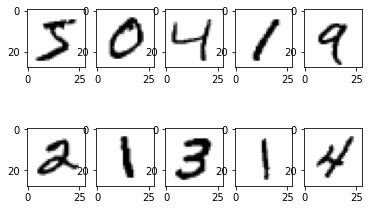

In [36]:
import matplotlib.pyplot as plt # To install: pip install matplotlib

# visualise some examples from the dataset 
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
#     im_idx = np.argwhere(teset[1] == i)[0]
    plottable_image = np.reshape(tset[0][i], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

In [37]:
# we will use only 9000 images for training and 1000 for testing 

# Just use the first 9000 images for training 
tread = 9000
train_in = tset[0][:tread,:]

# This is a little bit of work -- 1 of N encoding
# Make sure you understand how it does it
train_tgt = np.zeros((tread,10))
for i in range(tread):
    train_tgt[i,tset[1][i]] = 1

# and use 1000 images for testing
teread = 1000
test_in = teset[0][:teread,:]
test_tgt = np.zeros((teread,10))
for i in range(teread):
    test_tgt[i,teset[1][i]] = 1
    
print(train_in)
print(train_tgt)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


#### Initialise the MLP classifier 

In [38]:
# We choose the first and second hidden layers to have 5 neurons each.
sizes = [784,5,5,10] # 784 is the number of pixels of the images and 10 is the number of classes 
classifier = MLP(sizes)

In [39]:
# TODO: open the mlp.py file and implement self.forwardPass and self.train methods
# test your implementation here 
# for now, let's keep the learning rate and the number of iterations unchanged  
classifier.train(train_in, train_tgt, 0.1, 1000)

Iteration:  0  Error:  4083.6299791978686
Iteration:  100  Error:  4044.929712888013
Iteration:  200  Error:  4037.9758529627575
Iteration:  300  Error:  4029.18867337419
Iteration:  400  Error:  4013.9782668734215
Iteration:  500  Error:  3984.9870892834565
Iteration:  600  Error:  3925.2203312506786
Iteration:  700  Error:  3793.862388742901
Iteration:  800  Error:  3575.689557017943
Iteration:  900  Error:  3364.2848569862344


In [40]:
# we evaluate our model on the testing set 
# and show the confusion matrix and the accuracy
classifier.evaluate(test_in, test_tgt)

The confusion matrix is:
[[  3.   0.   0.   0.   0.   2.   0.   0.   0.   0.]
 [  0. 124.  24.   5.   1.   2.   0.   8.   6.   1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 16.   0.  32.   7.  98.  19.   2.   5.  32.  65.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   2.  33.   6.   8.   5.  82.   1.   7.   0.]
 [ 65.   0.  27.  89.   3.  59.   3.  85.  44.  28.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
The accuracy is  39.2


array([[  3.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.],
       [  0., 124.,  24.,   5.,   1.,   2.,   0.,   8.,   6.,   1.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 16.,   0.,  32.,   7.,  98.,  19.,   2.,   5.,  32.,  65.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  1.,   2.,  33.,   6.,   8.,   5.,  82.,   1.,   7.,   0.],
       [ 65.,   0.,  27.,  89.,   3.,  59.,   3.,  85.,  44.,  28.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [ ]:
# you should expect the accuracy to be really low ~ most likely less than %50
# I think we can do better by experimenting with different learning rate and 
# number of neurons in each hidden layer. 

In [ ]:
# TODO: modify the network parameters to get the test accuracy above %90 
# you can change the learning rate, the number of neurons of each hidden layer
# and number of iterations. You can also implement the gradient descent algorithm
# with momentum and experiment it with different momentum values. 

In [41]:
best_sizes = [784,40,30,10]
best_beta = 5
best_momentum = 0.9
best_lr = 0.012 # best learning rate
best_niterations = 20000
best_classifier = MLP(sizes = best_sizes, beta=best_beta, momentum=best_momentum)
best_classifier.train(train_in, train_tgt, best_lr, best_niterations)
best_classifier.evaluate(test_in, test_tgt)

Iteration:  0  Error:  4096.074890106358
Iteration:  100  Error:  3933.453402548747
Iteration:  200  Error:  3685.309326083922
Iteration:  300  Error:  3250.262700823906
Iteration:  400  Error:  2772.363974956492
Iteration:  500  Error:  2413.5603062532505
Iteration:  600  Error:  2123.025552770171
Iteration:  700  Error:  1860.728161543908
Iteration:  800  Error:  1625.0783483346272
Iteration:  900  Error:  1420.4929619550364
Iteration:  1000  Error:  1249.4913824528671
Iteration:  1100  Error:  1104.3649490446974
Iteration:  1200  Error:  976.3972469090138
Iteration:  1300  Error:  868.1027915368905
Iteration:  1400  Error:  781.3183657518027
Iteration:  1500  Error:  713.2316194548283
Iteration:  1600  Error:  659.2054402916186
Iteration:  1700  Error:  615.2458781954333
Iteration:  1800  Error:  578.5074738470887
Iteration:  1900  Error:  547.0551460553144
Iteration:  2000  Error:  519.5678427693128
Iteration:  2100  Error:  495.1288824888089
Iteration:  2200  Error:  473.088364498

Iteration:  18400  Error:  39.447518790507075
Iteration:  18500  Error:  39.18509668844961
Iteration:  18600  Error:  38.9237886144558
Iteration:  18700  Error:  38.660497915953115
Iteration:  18800  Error:  38.39027406173157
Iteration:  18900  Error:  38.1050137578129
Iteration:  19000  Error:  37.792898981091035
Iteration:  19100  Error:  37.44661857046092
Iteration:  19200  Error:  37.08507712066787
Iteration:  19300  Error:  36.73975380936122
Iteration:  19400  Error:  36.41540248751669
Iteration:  19500  Error:  36.10190722013797
Iteration:  19600  Error:  35.79106153225592
Iteration:  19700  Error:  35.47925097170163
Iteration:  19800  Error:  35.167942701256706
Iteration:  19900  Error:  34.8613977804182
The confusion matrix is:
[[ 82.   0.   2.   1.   0.   1.   3.   0.   0.   0.]
 [  0. 124.   0.   0.   0.   0.   0.   3.   0.   0.]
 [  1.   0. 107.   2.   2.   0.   0.   4.   3.   0.]
 [  0.   0.   0.  97.   0.   1.   0.   0.   2.   0.]
 [  0.   0.   1.   0. 104.   0.   2.   1. 

array([[ 82.,   0.,   2.,   1.,   0.,   1.,   3.,   0.,   0.,   0.],
       [  0., 124.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.],
       [  1.,   0., 107.,   2.,   2.,   0.,   0.,   4.,   3.,   0.],
       [  0.,   0.,   0.,  97.,   0.,   1.,   0.,   0.,   2.,   0.],
       [  0.,   0.,   1.,   0., 104.,   0.,   2.,   1.,   1.,   3.],
       [  1.,   0.,   0.,   4.,   0.,  81.,   0.,   0.,   2.,   1.],
       [  1.,   1.,   1.,   1.,   0.,   1.,  82.,   0.,   0.,   0.],
       [  0.,   0.,   3.,   1.,   0.,   0.,   0.,  91.,   0.,   2.],
       [  0.,   1.,   2.,   1.,   0.,   2.,   0.,   0.,  80.,   3.],
       [  0.,   0.,   0.,   0.,   4.,   1.,   0.,   0.,   1.,  85.]])

In [42]:
# TODO: run the following code to save the best parameters and 
# the weights of the network that achieves the desired accuracy
best_parameters = {
    'sizes': best_sizes,
    'beta': best_beta,
    'momentum': best_momentum,
    'lr': best_lr,
    'niterations': best_niterations,
    'weights_1': best_classifier.weights1,
    'weights_2': best_classifier.weights2,
    'weights_3': best_classifier.weights3,
}

with open('best_classifier.pkl', 'wb') as handle:
    pickle.dump(best_parameters, handle, protocol=pickle.HIGHEST_PROTOCOL)